**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [6]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self._n_neighbors = n_neighbors
        self._algorithm = algorithm

    def fit(self, X, y):
        self._X_train = X.astype(float)
        self._y_train = y
        if self._algorithm == 'kd_tree':
            self._tree = KDTree(X)

    def _dist(self, X):

        X = X.astype(float)
        dist = np.zeros((len(X), len(self._X_train))).astype(float)
        cnt = 0
        for i in X:
            dist[cnt] = np.sum((self._X_train-i)**2, axis=1)
            cnt += 1
        return np.sqrt(dist)

    def _predict(self, X):

        if self._algorithm == 'brute':
            return self._y_train[self._dist(X).argpartition(self._n_neighbors)
                                 [:, :self._n_neighbors]].astype('int64')
        if self._algorithm == 'kd_tree':
            return self._y_train[self._tree.query(X.astype(float),
                                 k=self._n_neighbors)[1]].astype('int64')

    def predict(self, X):

        tmp = self._predict(X)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1,
                                   tmp)

    def predict_proba(self, X):

        tmp = self._predict(X)
        uniq = len(np.unique(self._y_train))
        tmp = np.apply_along_axis(lambda x: np.bincount(x,
                                  minlength=uniq), 1, tmp)
        return np.apply_along_axis(lambda x: x / self._n_neighbors, 1,
                                   tmp)

    def score(self, X, y):
        return np.average(self.predict(X) == y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 4.51 ms, sys: 52 µs, total: 4.57 ms
Wall time: 4.75 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 61 µs, sys: 6 µs, total: 67 µs
Wall time: 76.3 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 2.63 ms, sys: 0 ns, total: 2.63 ms
Wall time: 2.41 ms


array([0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 6.28 ms, sys: 0 ns, total: 6.28 ms
Wall time: 4.86 ms


array([0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.94 ms, sys: 204 µs, total: 2.14 ms
Wall time: 2.41 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.2 ms, sys: 3.18 ms, total: 7.38 ms
Wall time: 5.84 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [7]:
#%%pycodestyle

points = []
for i in range(1, 30):

    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    tmps = []
    for i in range(150):

        X_train, X_test, y_train, y_test = \
            train_test_split(iris.data,
                             iris.target,
                             test_size=0.1,
                             stratify=iris.target)
        my_clf.fit(X_train, y_train)
        tmps.append(my_clf.score(X_test, y_test))

    points.append(np.mean(tmps))
best_choice = np.argmax(points)+1


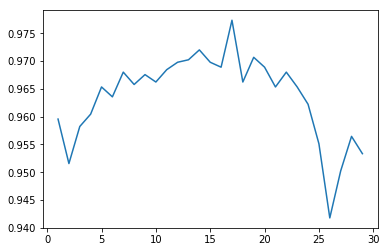

In [15]:
plt.plot(range(1,30), points[:30])

**MNIST**

In [31]:
mnist = fetch_mldata('MNIST original')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [33]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [34]:
%time clf.fit(X_train, y_train)

CPU times: user 3min 10s, sys: 1.34 s, total: 3min 11s
Wall time: 3min 9s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [35]:
%time my_clf.fit(X_train, y_train)

CPU times: user 72.8 ms, sys: 344 ms, total: 417 ms
Wall time: 415 ms


In [36]:
%time clf.predict(X_test)

CPU times: user 3min 55s, sys: 47.4 ms, total: 3min 55s
Wall time: 3min 55s


array([0., 1., 3., 0., 6., 3., 0., 9., 3., 3., 6., 5., 6., 7., 1., 7., 4.,
       6., 4., 9., 8., 7., 5., 2., 0., 4., 7., 3., 2., 4., 7., 7., 1., 8.,
       4., 8., 8., 7., 2., 0., 8., 5., 6., 3., 0., 9., 6., 2., 3., 8., 9.,
       7., 2., 6., 8., 4., 0., 1., 3., 8., 8., 0., 9., 7., 9., 6., 4., 9.,
       9., 8., 1., 0., 0., 7., 8., 6., 2., 7., 9., 3., 5., 6., 6., 5., 0.,
       6., 0., 8., 7., 5., 6., 2., 1., 0., 6., 9., 3., 0., 9., 6., 3., 1.,
       6., 0., 4., 0., 6., 6., 2., 3., 3., 4., 5., 8., 4., 2., 5., 3., 9.,
       0., 4., 9., 4., 4., 2., 7., 1., 1., 3., 8., 7., 0., 4., 6., 8., 6.,
       0., 6., 3., 1., 5., 7., 4., 9., 2., 1., 2., 2., 2., 8., 0., 2., 2.,
       9., 1., 7., 4., 2., 1., 4., 7., 1., 1., 4., 1., 2., 7., 8., 9., 3.,
       1., 3., 2., 3., 4., 8., 6., 0., 4., 3., 8., 5., 4., 7., 0., 0., 5.,
       7., 0., 7., 9., 5., 1., 2., 1., 2., 4., 1., 5., 6., 7., 1., 9., 4.,
       3., 2., 6., 9., 2., 5., 2., 6., 1., 6., 9., 0., 9., 8., 1., 7., 7.,
       4., 9., 3., 1., 4.

In [37]:
%time my_clf.predict(X_test)

CPU times: user 16min 9s, sys: 5min 7s, total: 21min 16s
Wall time: 10min 7s


array([0, 1, 3, 0, 6, 3, 0, 9, 3, 3, 6, 5, 6, 7, 1, 7, 4, 6, 4, 9, 8, 7,
       5, 2, 0, 4, 7, 3, 2, 4, 7, 7, 1, 8, 4, 8, 8, 7, 2, 0, 8, 5, 6, 3,
       0, 9, 6, 2, 3, 8, 9, 7, 2, 6, 8, 4, 0, 1, 3, 8, 8, 0, 9, 7, 9, 6,
       4, 9, 9, 8, 1, 0, 0, 7, 8, 6, 2, 7, 9, 3, 5, 6, 6, 5, 0, 6, 0, 8,
       7, 5, 6, 2, 1, 0, 6, 9, 3, 0, 9, 6, 3, 1, 6, 0, 4, 0, 6, 6, 2, 3,
       3, 4, 5, 8, 4, 2, 5, 3, 9, 0, 4, 9, 4, 4, 2, 7, 1, 1, 3, 8, 7, 0,
       4, 6, 8, 6, 0, 6, 3, 1, 5, 7, 4, 9, 2, 1, 2, 2, 2, 8, 0, 2, 2, 9,
       1, 7, 4, 2, 1, 4, 7, 1, 1, 4, 1, 2, 7, 8, 9, 3, 1, 3, 2, 3, 4, 8,
       6, 0, 4, 3, 8, 5, 4, 7, 0, 0, 5, 7, 0, 7, 9, 5, 1, 2, 1, 2, 4, 1,
       5, 6, 7, 1, 9, 4, 3, 2, 6, 9, 2, 5, 2, 6, 1, 6, 9, 0, 9, 8, 1, 7,
       7, 4, 9, 3, 1, 4, 2, 8, 5, 9, 2, 9, 5, 4, 4, 0, 5, 4, 4, 7, 8, 9,
       2, 7, 3, 5, 0, 6, 4, 1, 7, 5, 5, 7, 2, 4, 9, 3, 1, 7, 5, 4, 8, 9,
       2, 0, 2, 6, 8, 5, 5, 7, 7, 9, 0, 3, 4, 0, 4, 4, 9, 5, 9, 8, 7, 3,
       5, 6, 1, 6, 3, 9, 7, 6, 1, 5, 5, 1, 3, 4, 0,

In [38]:
%time clf.predict_proba(X_test)

CPU times: user 3min 55s, sys: 13.4 ms, total: 3min 55s
Wall time: 3min 55s


array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [39]:
%time my_clf.predict_proba(X_test)

CPU times: user 16min 16s, sys: 4min 54s, total: 21min 10s
Wall time: 9min 49s


array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [40]:
clf.score(X_test, y_test)

0.9671428571428572

In [41]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 4

In [21]:
clf = KNeighborsClassifier(n_neighbors=best_choice, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=best_choice, algorithm='kd_tree')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [23]:
%time clf.fit(X_train, y_train)

CPU times: user 3min 5s, sys: 1.5 s, total: 3min 6s
Wall time: 3min 4s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [24]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3min 4s, sys: 2.08 s, total: 3min 6s
Wall time: 3min 4s


In [25]:
%time clf.predict(X_test)

CPU times: user 3min 58s, sys: 356 ms, total: 3min 58s
Wall time: 3min 58s


array([3., 3., 1., 8., 3., 2., 8., 1., 5., 9., 7., 6., 5., 7., 4., 7., 1.,
       1., 3., 0., 6., 3., 4., 4., 2., 3., 8., 4., 6., 4., 1., 0., 0., 2.,
       4., 5., 1., 4., 2., 2., 1., 4., 1., 5., 8., 9., 1., 8., 5., 2., 4.,
       1., 5., 7., 1., 9., 2., 5., 1., 7., 6., 5., 5., 7., 1., 9., 4., 7.,
       9., 9., 7., 5., 7., 5., 1., 7., 0., 7., 7., 3., 3., 4., 9., 5., 3.,
       8., 5., 5., 1., 1., 9., 9., 1., 9., 1., 6., 8., 7., 1., 9., 7., 8.,
       6., 5., 1., 3., 2., 5., 0., 8., 1., 7., 6., 2., 7., 6., 0., 8., 1.,
       5., 2., 3., 3., 1., 7., 9., 1., 4., 0., 5., 1., 4., 4., 5., 9., 5.,
       0., 0., 1., 7., 9., 7., 0., 1., 0., 8., 0., 0., 1., 8., 9., 3., 6.,
       5., 1., 0., 3., 8., 5., 2., 2., 8., 0., 6., 5., 9., 6., 7., 6., 2.,
       8., 0., 4., 3., 4., 0., 4., 4., 1., 0., 4., 9., 9., 7., 9., 6., 5.,
       2., 2., 9., 2., 4., 9., 8., 7., 7., 3., 6., 0., 8., 0., 2., 4., 0.,
       7., 2., 4., 1., 3., 0., 0., 1., 3., 1., 4., 0., 8., 1., 1., 5., 6.,
       9., 6., 5., 4., 6.

In [26]:
%time my_clf.predict(X_test)

CPU times: user 3min 16s, sys: 131 ms, total: 3min 16s
Wall time: 3min 15s


array([3, 3, 1, 8, 3, 2, 8, 1, 5, 9, 7, 6, 5, 7, 4, 7, 1, 1, 3, 0, 6, 3,
       4, 4, 2, 3, 8, 4, 6, 4, 1, 0, 0, 2, 4, 5, 1, 4, 2, 2, 1, 4, 1, 5,
       8, 9, 1, 8, 5, 2, 4, 1, 5, 7, 1, 9, 2, 5, 1, 7, 6, 5, 5, 7, 1, 9,
       4, 7, 9, 9, 7, 5, 7, 5, 1, 7, 0, 7, 7, 3, 3, 4, 9, 5, 3, 8, 5, 5,
       1, 1, 9, 9, 1, 9, 1, 6, 8, 7, 1, 9, 7, 8, 6, 5, 1, 3, 2, 5, 0, 8,
       1, 7, 6, 2, 7, 6, 0, 8, 1, 5, 2, 3, 3, 1, 7, 9, 1, 4, 0, 5, 1, 4,
       4, 5, 9, 5, 0, 0, 1, 7, 9, 7, 0, 1, 0, 8, 0, 0, 1, 8, 9, 3, 6, 5,
       1, 0, 3, 8, 5, 2, 2, 8, 0, 6, 5, 9, 6, 7, 6, 2, 8, 0, 4, 3, 4, 0,
       4, 4, 1, 0, 4, 9, 9, 7, 9, 6, 5, 2, 2, 9, 2, 4, 9, 8, 7, 7, 3, 6,
       0, 8, 0, 2, 4, 0, 7, 2, 4, 1, 3, 0, 0, 1, 3, 1, 4, 0, 8, 1, 1, 5,
       6, 9, 6, 5, 4, 6, 4, 3, 5, 1, 6, 8, 0, 7, 9, 7, 6, 3, 7, 5, 3, 6,
       2, 7, 2, 3, 3, 0, 5, 1, 1, 9, 1, 2, 3, 1, 1, 1, 1, 3, 9, 4, 7, 9,
       5, 3, 2, 5, 2, 5, 9, 5, 6, 9, 0, 4, 3, 9, 9, 1, 3, 3, 0, 9, 0, 6,
       3, 6, 6, 2, 6, 9, 3, 9, 0, 3, 7, 8, 1, 0, 4,

In [27]:
%time clf.predict_proba(X_test)

CPU times: user 3min 57s, sys: 367 ms, total: 3min 57s
Wall time: 3min 57s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.        ,
        0.17647059],
       [0.        , 0.        , 0.        , ..., 0.11764706, 0.        ,
        0.88235294]])

In [28]:
%time my_clf.predict_proba(X_test)

CPU times: user 3min 19s, sys: 47.1 ms, total: 3min 19s
Wall time: 3min 19s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.        ,
        0.17647059],
       [0.        , 0.        , 0.        , ..., 0.11764706, 0.        ,
        0.88235294]])

In [29]:
clf.score(X_test, y_test)

0.9728571428571429

In [30]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 5

In [ ]:
# seaborn
"""
    Библиотека для визуализации данных, основанная на matplotlib. Предоставляет высокоуровневый интерфейс для 
создания красивых и информативных графиков
"""
# matplotlib
"""
    Библиотека для визуализации данных двумерной графикой
"""
# train_test_split
"""
    Функция, разделяющая выборку на обучающую и тестовую
"""
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)

# StandardScaler (from sklearn.preprocessing import StandardScaler)
"""
    Класс, используемый для нормализации/стандартизации признаков
"""
# ClassifierMixin
"""
    Базовый класс для классификаторов
"""
# NeighborsBase
"""
    Базовый класс для предсказателей, использующих NN метод
"""
# KNeighborsMixin
"""
    Миксин, от которого наследуются классы, использующие поиск KNN
"""
# SupervisedIntegerMixin
"""
    Класс, содержащий (только) метод fit
"""